In [26]:
# Shreyan Chatterjee

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA , KernelPCA


ModuleNotFoundError: No module named 'yellowbrick'

In [6]:
data = pd.read_csv("customers.csv")
print(f"Shape of data: {data.shape}")
data.head()

Shape of data: (2000, 8)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
data = data.drop("ID",axis=1)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [9]:
disc_var = ["Sex","Marital status","Education","Occupation","Settlement size"]

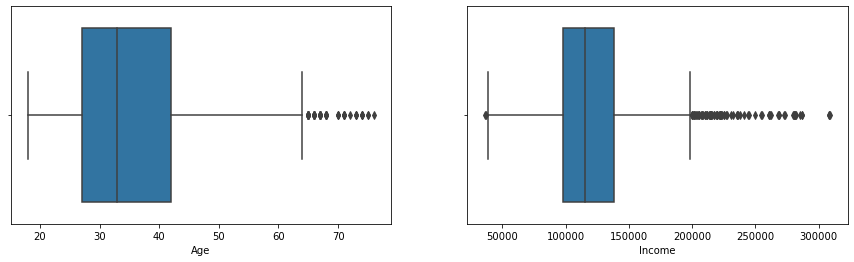

In [10]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data=data,x="Age")
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Income")
plt.show()

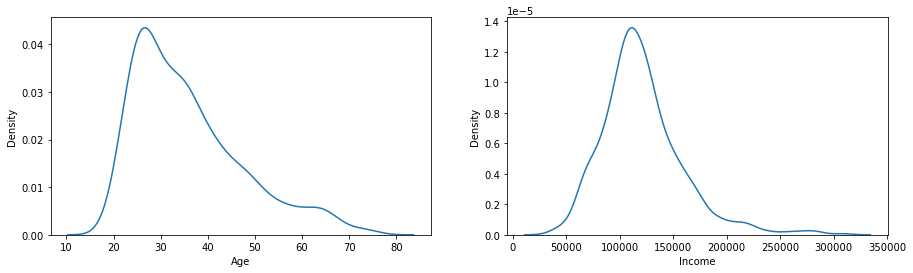

Skewness in Age: 1.0099400353025316,Skewness in Income: 1.196085430267935


In [11]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data,x="Age")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income")
plt.show()

print(f"Skewness in Age: {data.Age.skew()},Skewness in Income: {data.Income.skew()}")

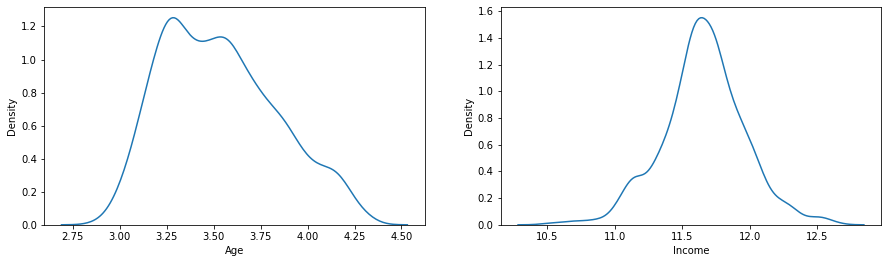

Skewness in Age: 0.4149263147446241,Skewness in Income: -0.09929738619793671


In [12]:
data["Age"] = np.log(data["Age"])
data["Income"] = np.log(data["Income"])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data,x="Age")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income")
plt.show()

print(f"Skewness in Age: {data.Age.skew()},Skewness in Income: {data.Income.skew()}")

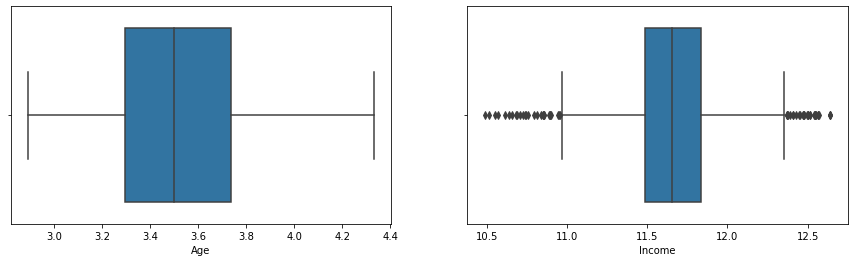

In [13]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data=data,x="Age")
plt.subplot(1,2,2)
sns.boxplot(data=data,x="Income")
plt.show()

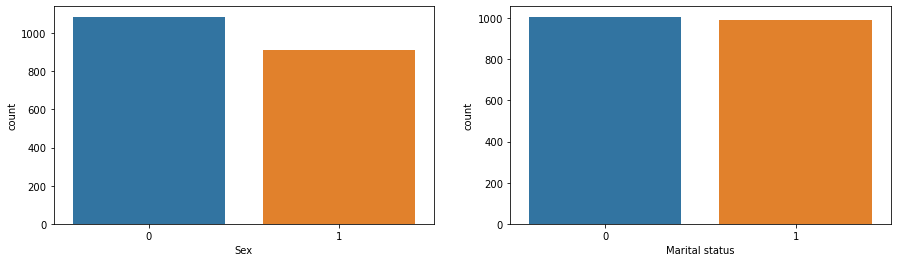

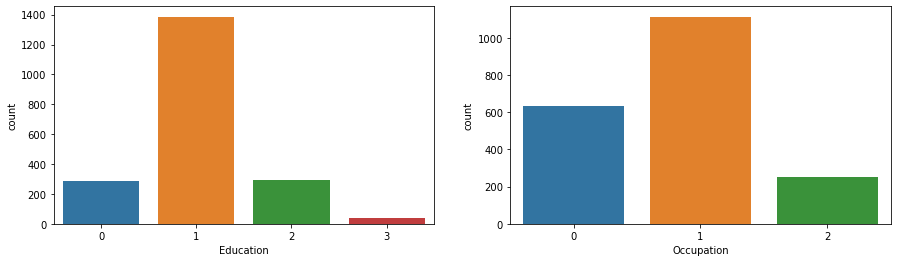

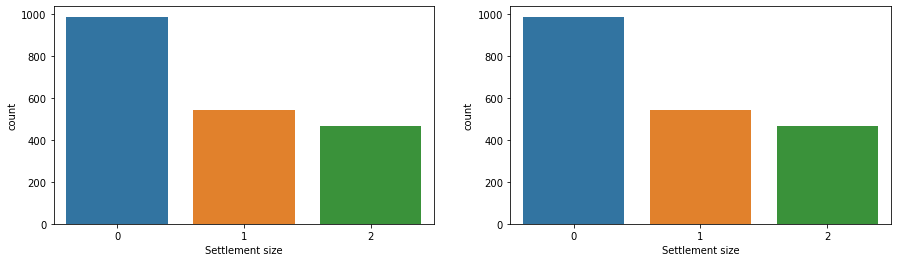

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x="Sex")
plt.subplot(1,2,2)
sns.countplot(data=data,x="Marital status")
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x="Education")
plt.subplot(1,2,2)
sns.countplot(data=data,x="Occupation")
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x="Settlement size")
plt.subplot(1,2,2)
sns.countplot(data=data,x="Settlement size")
plt.show()


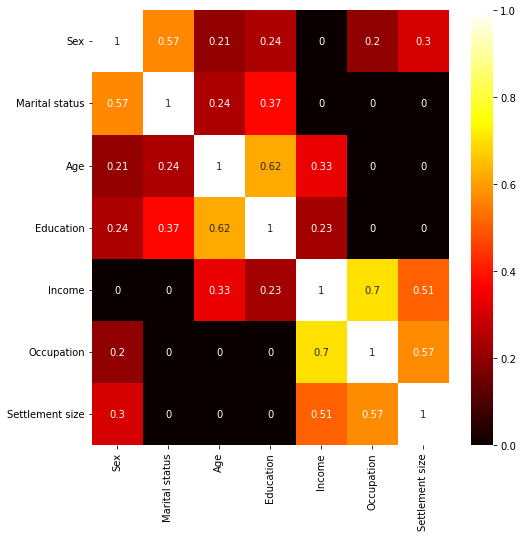

In [15]:
plt.figure(figsize=(8,8))
corr_data = abs(data.corr())
corr_data[corr_data<0.2] = 0
sns.heatmap(corr_data,cmap='hot',vmin=0,vmax=1,annot=True,)
plt.show()

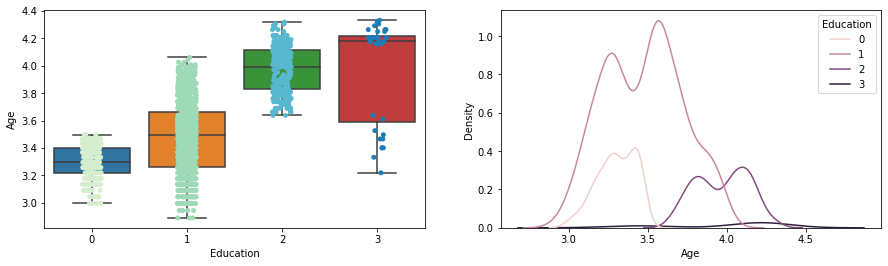

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data=data,x="Education",y="Age")
sns.stripplot(data=data,x="Education",y="Age",palette="GnBu")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Age",hue="Education")
plt.show()

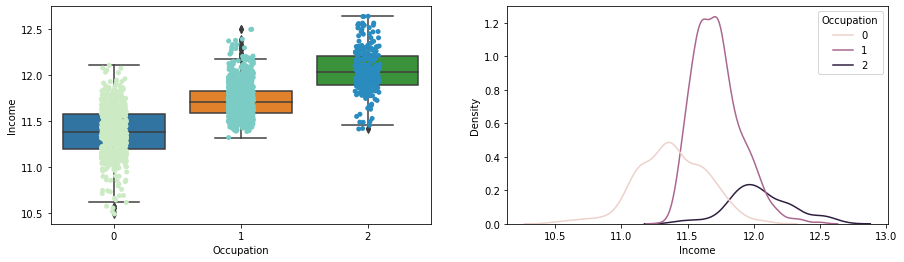

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data=data,x="Occupation",y="Income")
sns.stripplot(data=data,x="Occupation",y="Income",palette="GnBu")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Occupation")
plt.show()

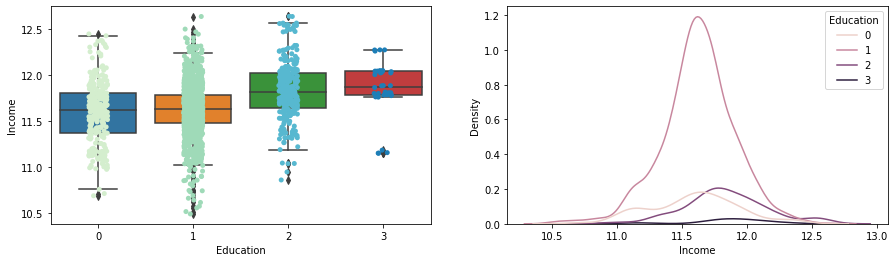

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data=data,x="Education",y="Income")
sns.stripplot(data=data,x="Education",y="Income",palette="GnBu")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Education")
plt.show()

<AxesSubplot:xlabel='Marital status', ylabel='count'>

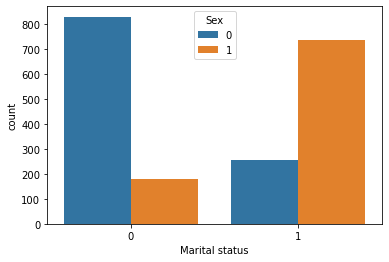

In [19]:
sns.countplot(data=data,x="Marital status",hue="Sex")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

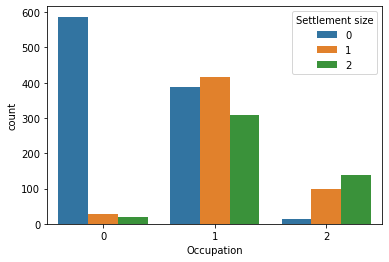

In [20]:
sns.countplot(data=data,x="Occupation",hue="Settlement size")

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

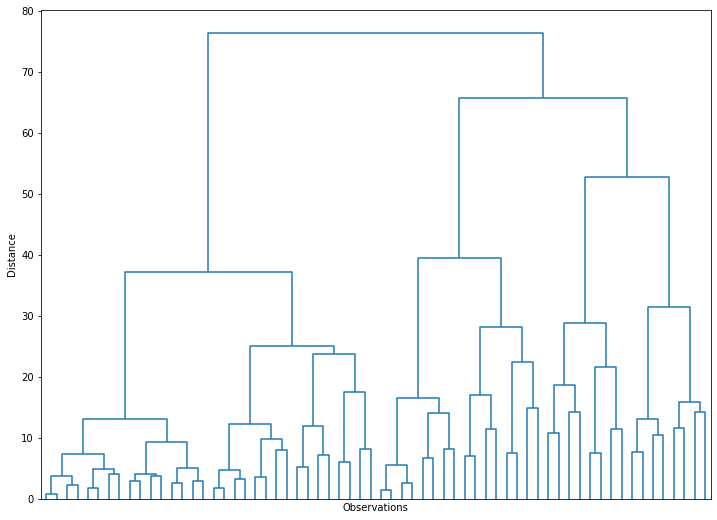

In [22]:
plt.figure(figsize=(12, 9))
plt.xlabel('Observations')
plt.ylabel('Distance')

h_cluster = linkage(X, method='ward')

dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True,
           color_threshold=0,
           truncate_mode='level',
           p=5)
plt.show()

In [23]:
AC = AgglomerativeClustering(
                  affinity ='euclidean',
                  linkage = 'ward'
                 )

visualizer_01 = KElbowVisualizer(AC, k=(2,12), metric='calinski_harabasz', timings=False ,locate_elbow=False)
visualizer_02 = KElbowVisualizer(AC, k=(2,12), metric='silhouette', timings=False ,locate_elbow=False)
visualizer_03 = KElbowVisualizer(AC, k=(2,12), metric='distortion', timings=False ,locate_elbow=False)

visualizer_01.fit(X)

visualizer_01.show()

NameError: name 'AgglomerativeClustering' is not defined

In [24]:
visualizer_02.fit(X)

visualizer_02.show()

NameError: name 'visualizer_02' is not defined

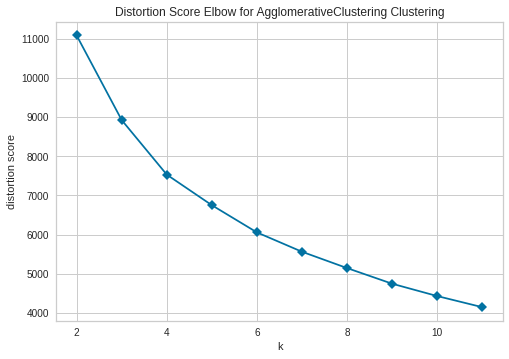

In [ ]:
visualizer_03.fit(X)

visualizer_03.show()

In [ ]:
AC = AgglomerativeClustering(
                  n_clusters = 4,
                  affinity ='euclidean',
                  linkage = 'ward'
                 )


hir_clstr = AC.fit_predict(X)


In [ ]:
hir_cl_ss = silhouette_score(X, hir_clstr, metric='euclidean')

<Figure size 864x432 with 0 Axes>

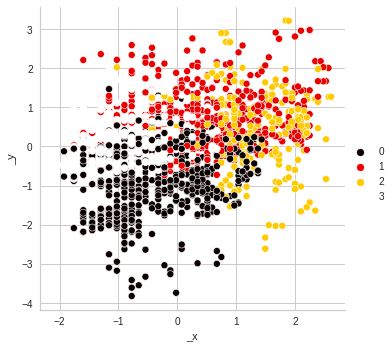

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.relplot( x = X[:,2] , y = X[:,4]  ,hue = hir_clstr , palette="hot")
plt.show()

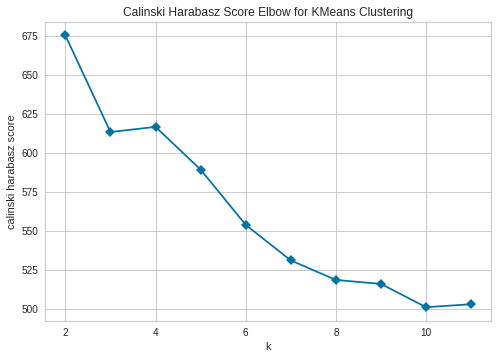

In [ ]:

kmeans = KMeans(init = 'k-means++',random_state = 20
                )

visualizer_01 = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz', timings=False ,locate_elbow=False)
visualizer_02 = KElbowVisualizer(kmeans, k=(2,12), metric='silhouette', timings=False ,locate_elbow=False)
visualizer_03 = KElbowVisualizer(kmeans, k=(2,12), metric='distortion', timings=False ,locate_elbow=False)

visualizer_01.fit(X)

visualizer_01.show() 

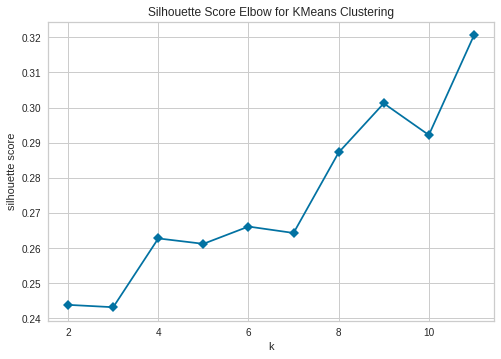

In [ ]:
visualizer_02.fit(X)

visualizer_02.show() 

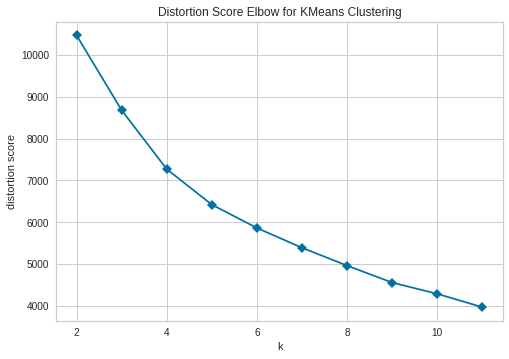

In [ ]:
visualizer_03.fit(X)

visualizer_03.show() 

In [ ]:
kmeans = KMeans(
                  n_clusters = 4,
                  init = 'k-means++',
                  random_state = 20
                 )

#visualizer_s = silhouette_visualizer(kmeans, X, colors='yellowbrick')

kmeans.fit(X)

KMeans(n_clusters=4, random_state=20)

In [ ]:
km_cl_ss = silhouette_score(X, kmeans.labels_, metric='euclidean')

In [ ]:
print(f"Hierarchial_Clustering: {hir_cl_ss:0.3f}, K-Means-Clustering: {km_cl_ss:0.3f}")

Hierarchial_Clustering: 0.251, K-Means-Clustering: 0.263


In [ ]:
data_1 = data.copy()
data_1['Segment'] = hir_clstr

data_2 = data.copy()
data_2['Segment'] = kmeans.labels_

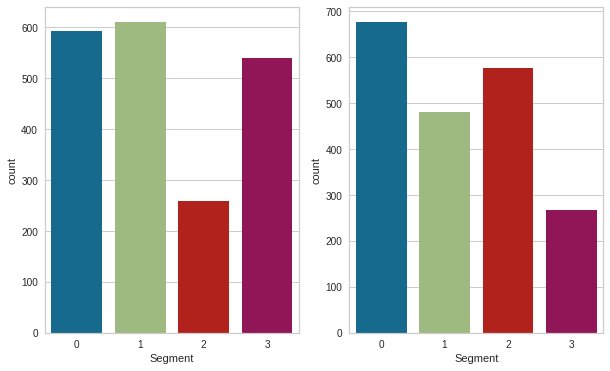

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=data_1,x="Segment")
plt.subplot(1,2,2)
sns.countplot(data=data_2,x="Segment")

<Figure size 720x360 with 0 Axes>

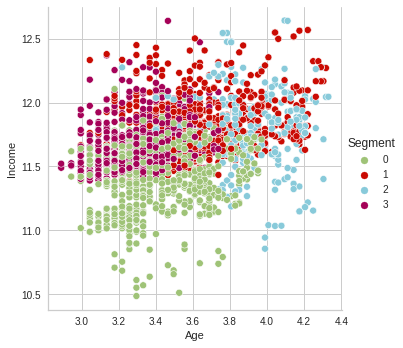

In [ ]:
plt.figure(figsize=(10,5))

sns.relplot(data=data_1,x="Age",y="Income",hue="Segment",palette=['g','r','c','m'])
plt.show()

<Figure size 720x360 with 0 Axes>

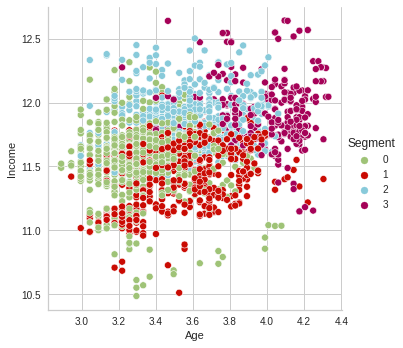

In [ ]:
plt.figure(figsize=(10,5))

sns.relplot(data=data_2,x="Age",y="Income",hue="Segment",palette=['g','r','c','m'])
plt.show()

In [ ]:

pca = PCA()
pca.fit(X)

pca.explained_variance_ratio_

array([0.36020324, 0.25810613, 0.19052552, 0.07463262, 0.05720898,
       0.03759067, 0.02173284])

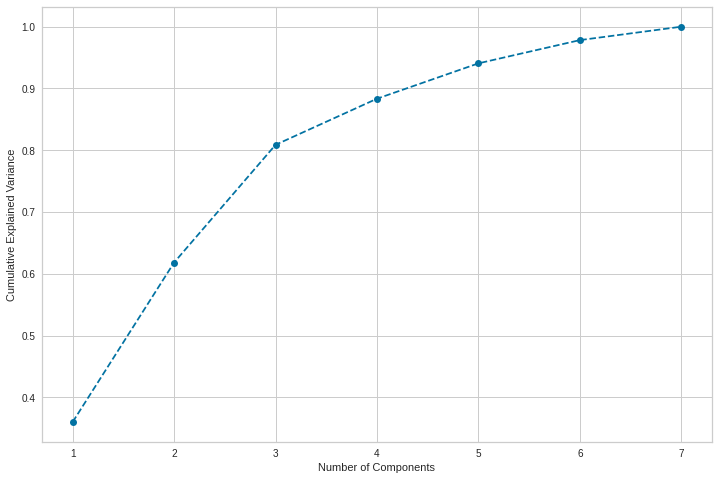

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
#pca = PCA(n_components=3)
pca = KernelPCA(kernel="rbf",gamma = 15,n_components=4)
pca.fit(X)
try:
  df_pca_components = pd.DataFrame(
      data=pca.components_.round(4),
      columns=data.columns.values,
      index=['component 1', 'component 2','component 3'])

  df_pca_components
except:
  pass

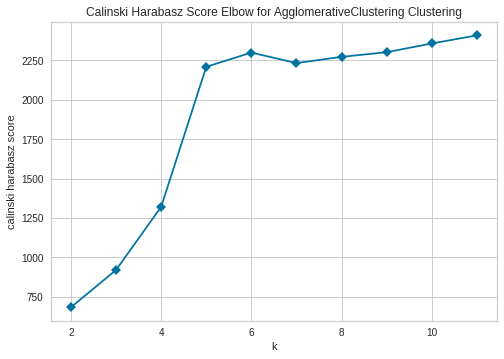

In [ ]:
X = pca.transform(X)

AC = AgglomerativeClustering(
                  affinity ='euclidean',
                  linkage = 'ward'
                 )

visualizer_01 = KElbowVisualizer(AC, k=(2,12), metric='calinski_harabasz', timings=False ,locate_elbow=False)
visualizer_02 = KElbowVisualizer(AC, k=(2,12), metric='silhouette', timings=False ,locate_elbow=False)
visualizer_03 = KElbowVisualizer(AC, k=(2,12), metric='distortion', timings=False ,locate_elbow=False)

visualizer_01.fit(X)

visualizer_01.show()

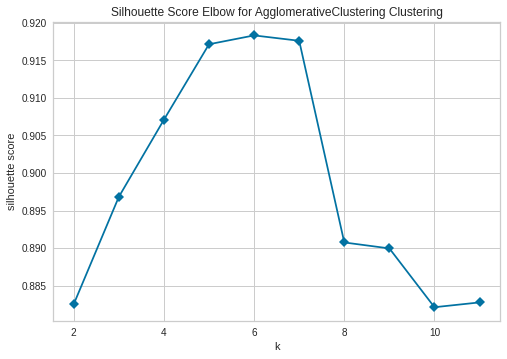

In [ ]:
visualizer_02.fit(X)

visualizer_02.show()

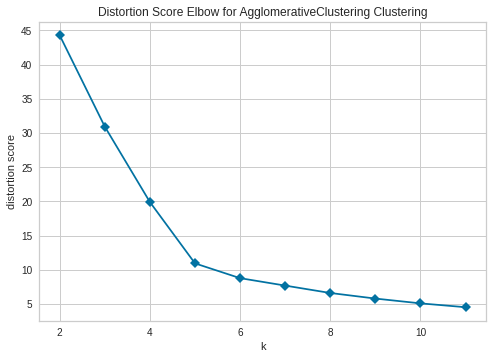

In [ ]:
visualizer_03.fit(X)

visualizer_03.show()

In [ ]:
AC = AgglomerativeClustering(
                  n_clusters = 5,
                  affinity ='euclidean',
                  linkage = 'ward'
                 )


hir_clstr = AC.fit_predict(X)

In [ ]:
hir_cl_ss_pca = silhouette_score(X, hir_clstr, metric='euclidean')

<Figure size 864x432 with 0 Axes>

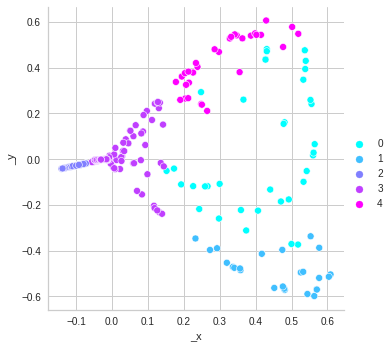

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.relplot( x = X[:,0] , y = X[:,1]  ,hue = hir_clstr , palette="cool")
plt.show()

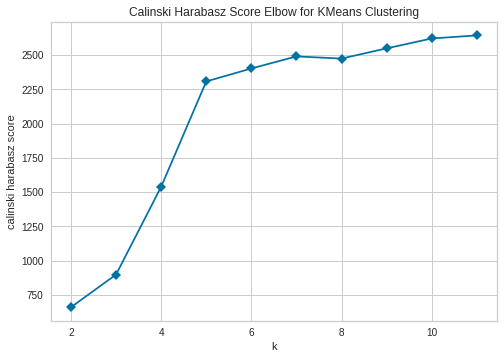

In [ ]:
kmeans = KMeans(init = 'k-means++',random_state = 20
                )

visualizer_01 = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz', timings=False ,locate_elbow=False)
visualizer_02 = KElbowVisualizer(kmeans, k=(2,12), metric='silhouette', timings=False ,locate_elbow=False)
visualizer_03 = KElbowVisualizer(kmeans, k=(2,12), metric='distortion', timings=False ,locate_elbow=False)

visualizer_01.fit(X)

visualizer_01.show() 

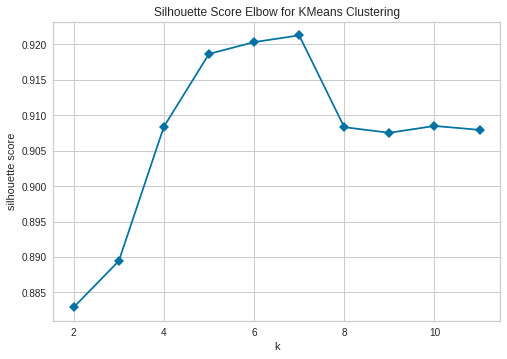

In [ ]:
visualizer_02.fit(X)

visualizer_02.show() 

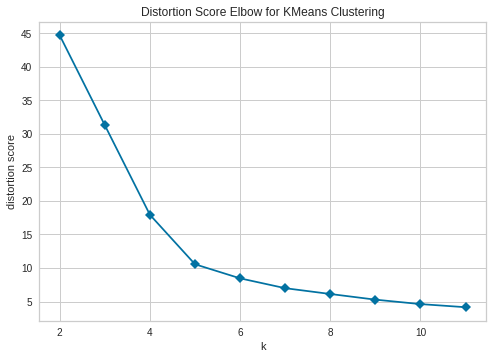

In [ ]:
visualizer_03.fit(X)

visualizer_03.show() 

In [ ]:
kmeans = KMeans(
                  n_clusters = 5,
                  init = 'k-means++',
                  random_state = 20
                 )


kmeans.fit(X)

KMeans(n_clusters=5, random_state=20)

<Figure size 864x432 with 0 Axes>

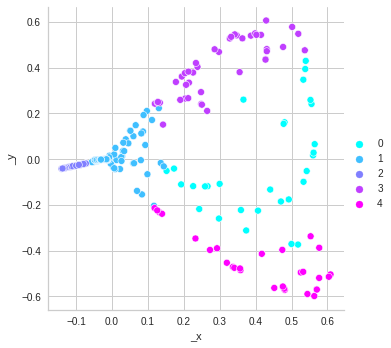

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.relplot( x = X[:,0] , y = X[:,1]  ,hue = kmeans.labels_ , palette="cool")
plt.show()

In [ ]:
km_cl_ss_pca = silhouette_score(X, kmeans.labels_, metric='euclidean')

In [ ]:
print("Before PCA")
print(f"Hierarchial_Clustering: {hir_cl_ss:0.3f}, K-Means-Clustering: {km_cl_ss:0.3f}")
print("After PCA")
print(f"Hierarchial_Clustering: {hir_cl_ss_pca:0.3f}, K-Means-Clustering: {km_cl_ss_pca:0.3f}")

Before PCA
Hierarchial_Clustering: 0.251, K-Means-Clustering: 0.263
After PCA
Hierarchial_Clustering: 0.917, K-Means-Clustering: 0.919


After PCA ( linear kernel ) \\
Hierarchial_Clustering: 0.340, K-Means-Clustering: 0.347